# Fall 2022 Data Science Intern Challenge 
## By Afshin Amini



Question 1: Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

<br>a.	Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
<br>b.	What metric would you report for this dataset?
<br>c.	What is its value?


In [7]:
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

# Q1:

In [4]:
# Let's summarize the data for 'order_amount'
df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

As it can be seen above, this data has very high standard deviation compared to its mean and quantiles which means its values are not centralized around the mean. This is an indication of outliers and the fact that in this case data distribution is not normal.

### Let's plot data distribution and check if there are outliers:

Text(0.5, 1.0, 'Order Amount Histogram')

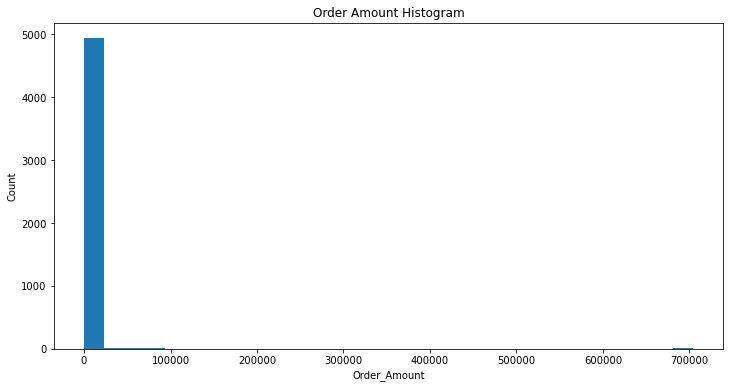

In [22]:
figure(figsize=(12, 6))
plt.hist(df['order_amount'], density=False, bins=30)  # density=False would make counts
plt.ylabel('Count')
plt.xlabel('Order_Amount');
plt.title('Order Amount Histogram')

- Distribution is not normal.

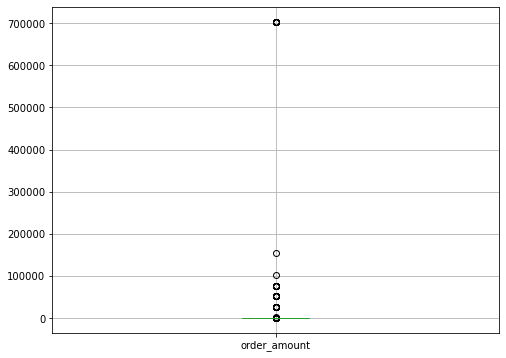

In [16]:
figure(figsize=(8, 6))
boxplot = df.boxplot(column=['order_amount'])

- Outliers can be seen as black circles.

Above figures confirms previous statement that this data has outliers and it's distribution is not normal. **Therefore, 'mean' is not a good represntation and instead 'median' should be reported.**


In [26]:
print ('The median of order amount is:', df['order_amount'].median(), 'dollars.' )

The median of order amount is: 284.0 dollars.


# Q2:

## a- How many orders were shipped by Speedy Express in total?

SELECT count(Orders.ShipperID)
<br>FROM (Orders
<br>INNER JOIN Shippers ON Orders.ShipperID = Shippers.ShipperID)
<br>Where ShipperName = 'Speedy Express'

<br>Answer = 54

## b- What is the last name of the employee with the most orders?

SELECT LastName, count(OrderID) as c
<br>FROM (Orders
<br>INNER JOIN Employees ON Orders.EmployeeID = Employees.EmployeeID)
<br>group by LastName
<br>order by c DESC
<br> LIMIT 1

<br>Answer: Peacock

## c- What product was ordered the most by customers in Germany?

SELECT Country, sum(Quantity) as s, ProductName
<br>FROM (Products
<br>INNER JOIN OrderDetails ON OrderDetails.ProductID = Products.ProductID
<br>INNER JOIN Orders ON Orders.OrderID = OrderDetails.OrderID
<br>INNER JOIN Customers ON Customers.CustomerID = Orders.CustomerID)
<br>where Country = 'Germany'
<br>group by ProductName
<br>order by s DESC
<br> LIMIT 1

<br>Answer: Boston Crab Meat